#Aim: Implement Decsion Tree classifier
• Implement Decision Tree classifier using scikit learn library
• Test the classifier for Weather dataset

###DT Weather Entropy

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny',
'Overcast',
'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast',
'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal'
,'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']
#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le = preprocessing.LabelEncoder()
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)


Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
features=list(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

Features: [(1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1)]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features,Play_encoded , test_size=0.3, random_state=113)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[(2, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (1, 1, 0, 0), (1, 2, 1, 1), (1, 2, 0, 0), (2, 2, 0, 0), (2, 2, 0, 1), (1, 0, 1, 0)]
[(0, 2, 0, 1), (0, 1, 1, 0), (2, 0, 1, 1), (1, 1, 0, 1), (2, 2, 1, 0)]
[1 1 1 0 1 0 1 0 1]
[1 1 0 0 1]


In [7]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 113)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 0 1]


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

[[1 1]
 [0 3]]
precision: 0.75
recall: 1.0


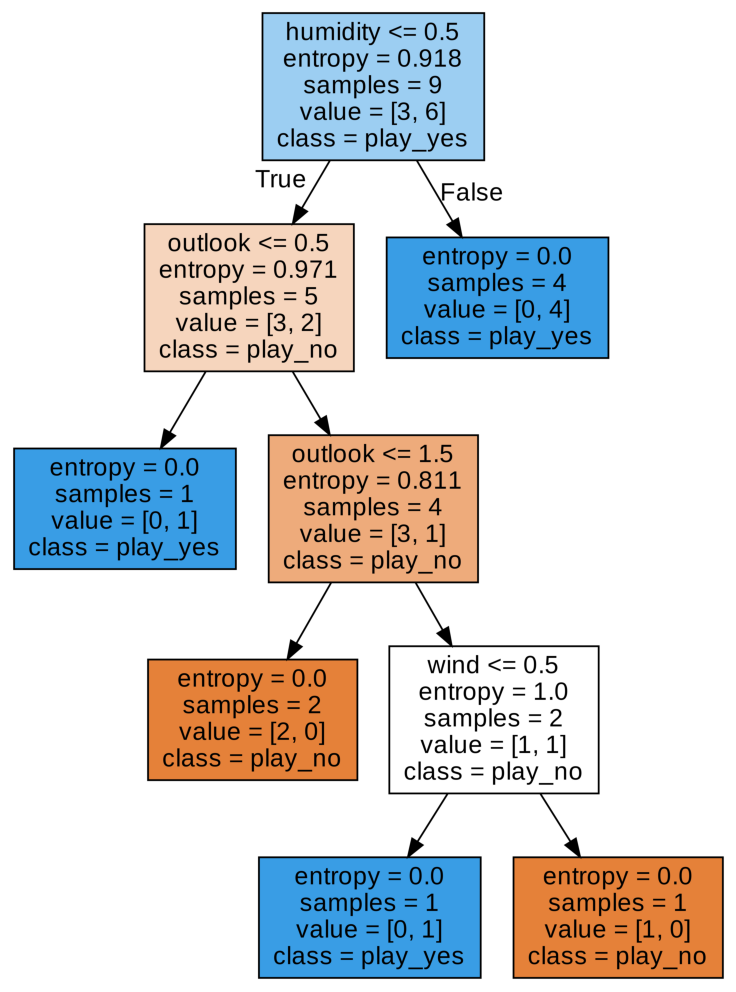

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'],
filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png',
'-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


###2_DT_Iris


In [10]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Load dataset
iris = datasets.load_iris()


In [11]:
# print the names of the 4 features
print("Features:",iris.feature_names)
# print the label type of iris(class_0, class_1, class_2)
print("Labels:",iris.target_names)
# print data(feature)shape
print("\nData shape: ",iris.data.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']

Data shape:  (150, 4)


In [12]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target , test_size=0.3, random_state=113)

In [13]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 113)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='iris_tree.dot',feature_names=list(iris.feature_names),class_names=list(iris.target_names), filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

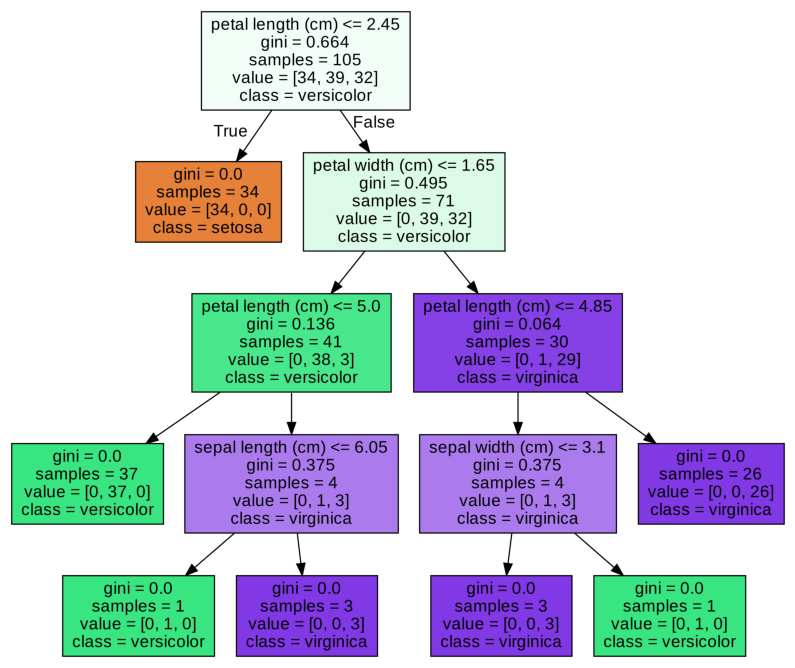

In [16]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()


#Exercise


###Task 1: Try the algo on Same Weather dataset - OneHotEncoding of features:and Train test Division 85%-15% and Gini Index as attribute selection measure

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [18]:
datasets = pd.read_csv('Dataset.csv') 
print(datasets)

     Outlook  Temp   Wind Humidity Class
0      Rainy   Hot  False     High    No
1      Rainy   Hot   True     High    No
2   Overcast   Hot  False     High   Yes
3      Sunny  Mild  False     High   Yes
4      Sunny  Cool  False   Normal   Yes
5      Sunny  Cool   True   Normal    No
6   Overcast  Cool   True   Normal   Yes
7      Rainy  Mild  False     High    No
8      Rainy  Cool  False   Normal   Yes
9      Sunny  Mild  False   Normal   Yes
10     Rainy  Mild   True   Normal   Yes
11  Overcast  Mild   True     High   Yes
12  Overcast   Hot  False   Normal   Yes
13     Sunny  Mild   True     High    No


In [19]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.Outlook.values.reshape(-1,1)).toarray()
y = onehotencoder.fit_transform(datasets.Temp.values.reshape(-1,1)).toarray()
z = onehotencoder.fit_transform(datasets.Wind.values.reshape(-1,1)).toarray()
w = onehotencoder.fit_transform(datasets.Humidity.values.reshape(-1,1)).toarray()

In [20]:
#R-1,O-0,S-2
x

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [21]:
#H-1,M-0,C-2
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
#F-0,T-1
z

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [23]:
#High-0,Normal-1
w

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [24]:
dfOneHot = pd.DataFrame(x, columns = ["Outlook_"+str(int(i)) for i in range(datasets.shape[1]-2)]) 
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['Outlook'], axis=1) 
#printing to verify 
print(df)
datasets = df

    Temp   Wind Humidity Class  Outlook_0  Outlook_1  Outlook_2
0    Hot  False     High    No        0.0        1.0        0.0
1    Hot   True     High    No        0.0        1.0        0.0
2    Hot  False     High   Yes        1.0        0.0        0.0
3   Mild  False     High   Yes        0.0        0.0        1.0
4   Cool  False   Normal   Yes        0.0        0.0        1.0
5   Cool   True   Normal    No        0.0        0.0        1.0
6   Cool   True   Normal   Yes        1.0        0.0        0.0
7   Mild  False     High    No        0.0        1.0        0.0
8   Cool  False   Normal   Yes        0.0        1.0        0.0
9   Mild  False   Normal   Yes        0.0        0.0        1.0
10  Mild   True   Normal   Yes        0.0        1.0        0.0
11  Mild   True     High   Yes        1.0        0.0        0.0
12   Hot  False   Normal   Yes        1.0        0.0        0.0
13  Mild   True     High    No        0.0        0.0        1.0


In [25]:
dfOneHot1 = pd.DataFrame(y, columns = ["Temp_"+str(int(i)) for i in range(df.shape[1]-4)]) 
df = pd.concat([df, dfOneHot1], axis=1) #column
#droping the country column 
df= df.drop(['Temp'], axis=1) 
#printing to verify 
print(df)
datasets = df

     Wind Humidity Class  Outlook_0  ...  Outlook_2  Temp_0  Temp_1  Temp_2
0   False     High    No        0.0  ...        0.0     0.0     1.0     0.0
1    True     High    No        0.0  ...        0.0     0.0     1.0     0.0
2   False     High   Yes        1.0  ...        0.0     0.0     1.0     0.0
3   False     High   Yes        0.0  ...        1.0     0.0     0.0     1.0
4   False   Normal   Yes        0.0  ...        1.0     1.0     0.0     0.0
5    True   Normal    No        0.0  ...        1.0     1.0     0.0     0.0
6    True   Normal   Yes        1.0  ...        0.0     1.0     0.0     0.0
7   False     High    No        0.0  ...        0.0     0.0     0.0     1.0
8   False   Normal   Yes        0.0  ...        0.0     1.0     0.0     0.0
9   False   Normal   Yes        0.0  ...        1.0     0.0     0.0     1.0
10   True   Normal   Yes        0.0  ...        0.0     0.0     0.0     1.0
11   True     High   Yes        1.0  ...        0.0     0.0     0.0     1.0
12  False   

In [26]:
dfOneHot3 = pd.DataFrame(z, columns = ["Wind_"+str(int(i)) for i in range(df.shape[1]-7)]) 
df = pd.concat([df, dfOneHot3], axis=1) #column
#droping the country column 
df= df.drop(['Wind'], axis=1) 
#printing to verify 
print(df)
datasets = df

   Humidity Class  Outlook_0  Outlook_1  ...  Temp_1  Temp_2  Wind_0  Wind_1
0      High    No        0.0        1.0  ...     1.0     0.0     1.0     0.0
1      High    No        0.0        1.0  ...     1.0     0.0     0.0     1.0
2      High   Yes        1.0        0.0  ...     1.0     0.0     1.0     0.0
3      High   Yes        0.0        0.0  ...     0.0     1.0     1.0     0.0
4    Normal   Yes        0.0        0.0  ...     0.0     0.0     1.0     0.0
5    Normal    No        0.0        0.0  ...     0.0     0.0     0.0     1.0
6    Normal   Yes        1.0        0.0  ...     0.0     0.0     0.0     1.0
7      High    No        0.0        1.0  ...     0.0     1.0     1.0     0.0
8    Normal   Yes        0.0        1.0  ...     0.0     0.0     1.0     0.0
9    Normal   Yes        0.0        0.0  ...     0.0     1.0     1.0     0.0
10   Normal   Yes        0.0        1.0  ...     0.0     1.0     0.0     1.0
11     High   Yes        1.0        0.0  ...     0.0     1.0     0.0     1.0

In [27]:
dfOneHot2 = pd.DataFrame(w, columns = ["Humidity_"+str(int(i)) for i in range(df.shape[1]-8)]) 
df = pd.concat([df, dfOneHot2], axis=1) #column
#droping the country column 
df= df.drop(['Humidity'], axis=1) 
#printing to verify 
print(df)
datasets = df

   Class  Outlook_0  Outlook_1  ...  Wind_1  Humidity_0  Humidity_1
0     No        0.0        1.0  ...     0.0         1.0         0.0
1     No        0.0        1.0  ...     1.0         1.0         0.0
2    Yes        1.0        0.0  ...     0.0         1.0         0.0
3    Yes        0.0        0.0  ...     0.0         1.0         0.0
4    Yes        0.0        0.0  ...     0.0         0.0         1.0
5     No        0.0        0.0  ...     1.0         0.0         1.0
6    Yes        1.0        0.0  ...     1.0         0.0         1.0
7     No        0.0        1.0  ...     0.0         1.0         0.0
8    Yes        0.0        1.0  ...     0.0         0.0         1.0
9    Yes        0.0        0.0  ...     0.0         0.0         1.0
10   Yes        0.0        1.0  ...     1.0         0.0         1.0
11   Yes        1.0        0.0  ...     1.0         1.0         0.0
12   Yes        1.0        0.0  ...     0.0         0.0         1.0
13    No        0.0        0.0  ...     1.0     

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
datasets

,Class,Outlook_0,Outlook_1,Outlook_2,Temp_0,Temp_1,Temp_2,Wind_0,Wind_1,Humidity_0,Humidity_1
0,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Yes,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,No,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,No,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,Yes,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,Yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [30]:
newdata = datasets.iloc[:,1:12]
newtarget = datasets.iloc[:,0:1]
print(newdata)
print(newtarget)

    Outlook_0  Outlook_1  Outlook_2  ...  Wind_1  Humidity_0  Humidity_1
0         0.0        1.0        0.0  ...     0.0         1.0         0.0
1         0.0        1.0        0.0  ...     1.0         1.0         0.0
2         1.0        0.0        0.0  ...     0.0         1.0         0.0
3         0.0        0.0        1.0  ...     0.0         1.0         0.0
4         0.0        0.0        1.0  ...     0.0         0.0         1.0
5         0.0        0.0        1.0  ...     1.0         0.0         1.0
6         1.0        0.0        0.0  ...     1.0         0.0         1.0
7         0.0        1.0        0.0  ...     0.0         1.0         0.0
8         0.0        1.0        0.0  ...     0.0         0.0         1.0
9         0.0        0.0        1.0  ...     0.0         0.0         1.0
10        0.0        1.0        0.0  ...     1.0         0.0         1.0
11        1.0        0.0        0.0  ...     1.0         1.0         0.0
12        1.0        0.0        0.0  ...     0.0   

In [31]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(newdata,
newtarget, test_size = 0.85, random_state = 113)

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=113,random_state=113)

# Train Decision Tree Classifer
clf = clf.fit(data_train,target_train)

#Predict the response for test dataset
y_pred = clf.predict(data_test)
print(y_pred)

['No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes']


In [33]:
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))
print("Recall:",metrics.recall_score(target_test, y_pred,average="binary",pos_label="No"))
print("Precision:",metrics.precision_score(target_test, y_pred,average="binary",pos_label="No"))
print("Confusion Matrix:",metrics.confusion_matrix(target_test, y_pred))

Accuracy: 0.5
Recall: 0.25
Precision: 0.25
Confusion Matrix: [[1 3]
 [3 5]]


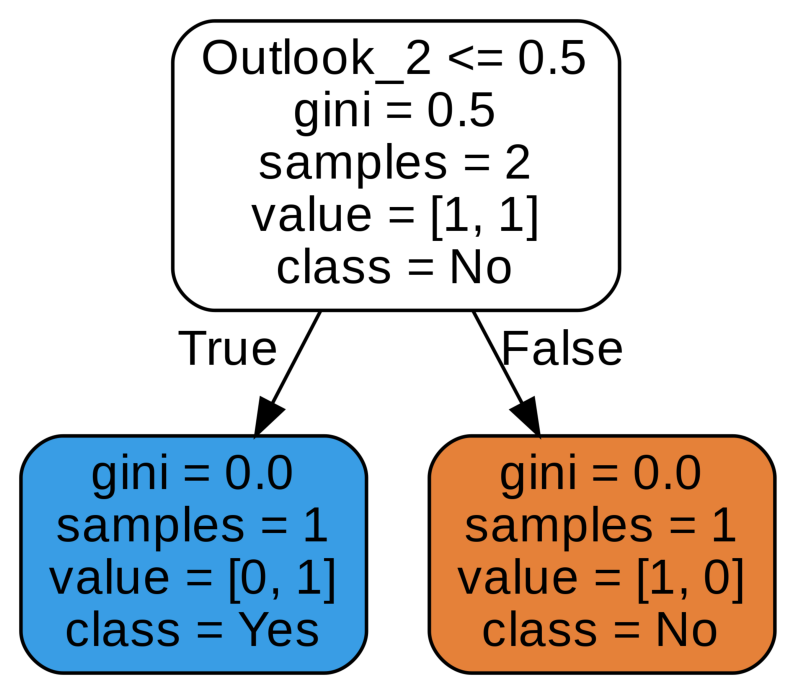

In [34]:
from sklearn.tree import export_graphviz

feature_names=['Outlook_0','Outlook_1','Outlook_2','Temp_0','Temp_1','Temp_2','Wind_0','Wind_1','Humidity_0','Humidity_1']
export_graphviz(clf,out_file='weather_tree.dot',feature_names=feature_names,class_names=['No','Yes'], filled=True,rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'weather_tree.dot', '-o', 'weather_tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('weather_tree.png'))
plt.axis('off')
plt.show()

In [35]:
#1).What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
test_data = [[0,1,0,0,0,1,0,1,1,0]]
output = clf.predict(test_data)
print(output)

['Yes']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [36]:
#2).What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity=’High’, and Wind = ’True’?
test_data = [[0,0,1,1,0,0,1,0,0,1]]
output = clf.predict(test_data)
print(output)

['No']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


###Task 2: Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features: and Train test Division 50%-50%

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [38]:
datasets = pd.read_csv('data.csv') 
print(datasets)

           id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]


In [39]:
datasets.isnull().sum()
datasets.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [40]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.diagnosis.values.reshape(-1,1)).toarray()
x

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [41]:
dfOneHot = pd.DataFrame(x, columns = ["diagnosis"+str(int(i)) for i in range(datasets.shape[1]-31)]) 
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['diagnosis'], axis=1) 
#printing to verify 
print(df)
datasets = df

           id  radius_mean  texture_mean  ...  Unnamed: 32  diagnosis0  diagnosis1
0      842302        17.99         10.38  ...          NaN         0.0         1.0
1      842517        20.57         17.77  ...          NaN         0.0         1.0
2    84300903        19.69         21.25  ...          NaN         0.0         1.0
3    84348301        11.42         20.38  ...          NaN         0.0         1.0
4    84358402        20.29         14.34  ...          NaN         0.0         1.0
..        ...          ...           ...  ...          ...         ...         ...
564    926424        21.56         22.39  ...          NaN         0.0         1.0
565    926682        20.13         28.25  ...          NaN         0.0         1.0
566    926954        16.60         28.08  ...          NaN         0.0         1.0
567    927241        20.60         29.33  ...          NaN         0.0         1.0
568     92751         7.76         24.54  ...          NaN         1.0         0.0

[56

In [42]:
newdata = datasets.iloc[:,0:31]
newtarget = datasets.iloc[:,32:34]
print(newdata)
print(newtarget)

           id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0      842302        17.99  ...          0.4601                  0.11890
1      842517        20.57  ...          0.2750                  0.08902
2    84300903        19.69  ...          0.3613                  0.08758
3    84348301        11.42  ...          0.6638                  0.17300
4    84358402        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564    926424        21.56  ...          0.2060                  0.07115
565    926682        20.13  ...          0.2572                  0.06637
566    926954        16.60  ...          0.2218                  0.07820
567    927241        20.60  ...          0.4087                  0.12400
568     92751         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]
     diagnosis0  diagnosis1
0           0.0         1.0
1           0.0         1.0
2           0.0

In [43]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(newdata,
newtarget, test_size = 0.50, random_state = 113)

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=113,random_state=113)

# Train Decision Tree Classifer
clf = clf.fit(data_train,target_train)

#Predict the response for test dataset
y_pred = clf.predict(data_test)
print(y_pred)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

In [45]:
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))
print("Recall:",metrics.recall_score(target_test, y_pred,average="weighted"))
print("Precision:",metrics.precision_score(target_test, y_pred,average="weighted"))

Accuracy: 0.9333333333333333
Recall: 0.9333333333333333
Precision: 0.9331171171171172


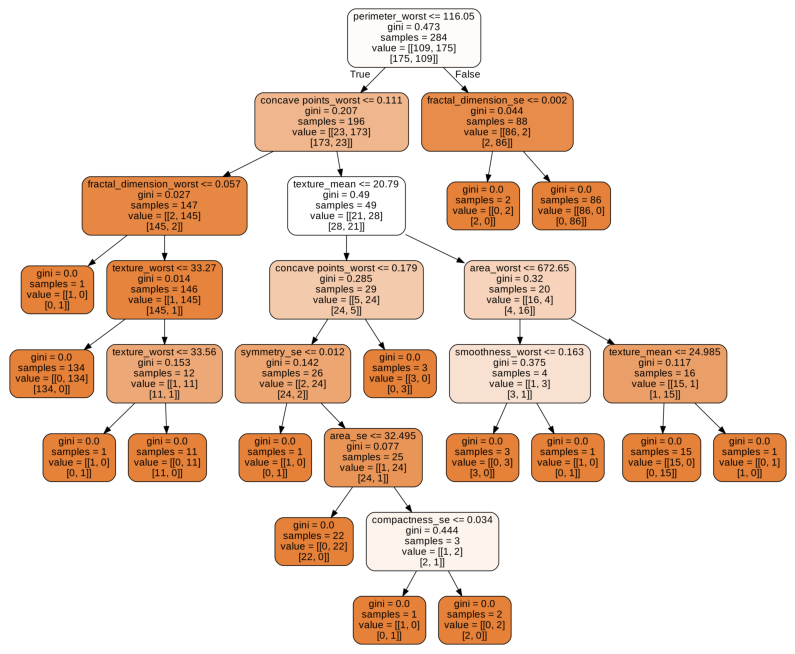

In [46]:
from sklearn.tree import export_graphviz

feature_names=["id", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
export_graphviz(clf,out_file='cancer.dot',feature_names=feature_names,class_names=['M','B'], filled=True,rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'cancer.dot', '-o', 'cancer.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('cancer.png'))
plt.axis('off')
plt.show()

#Pre-pruning and Post-pruning on heart dataset.

In [47]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [49]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


In [51]:
clf = tree.DecisionTreeClassifier(random_state=113)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

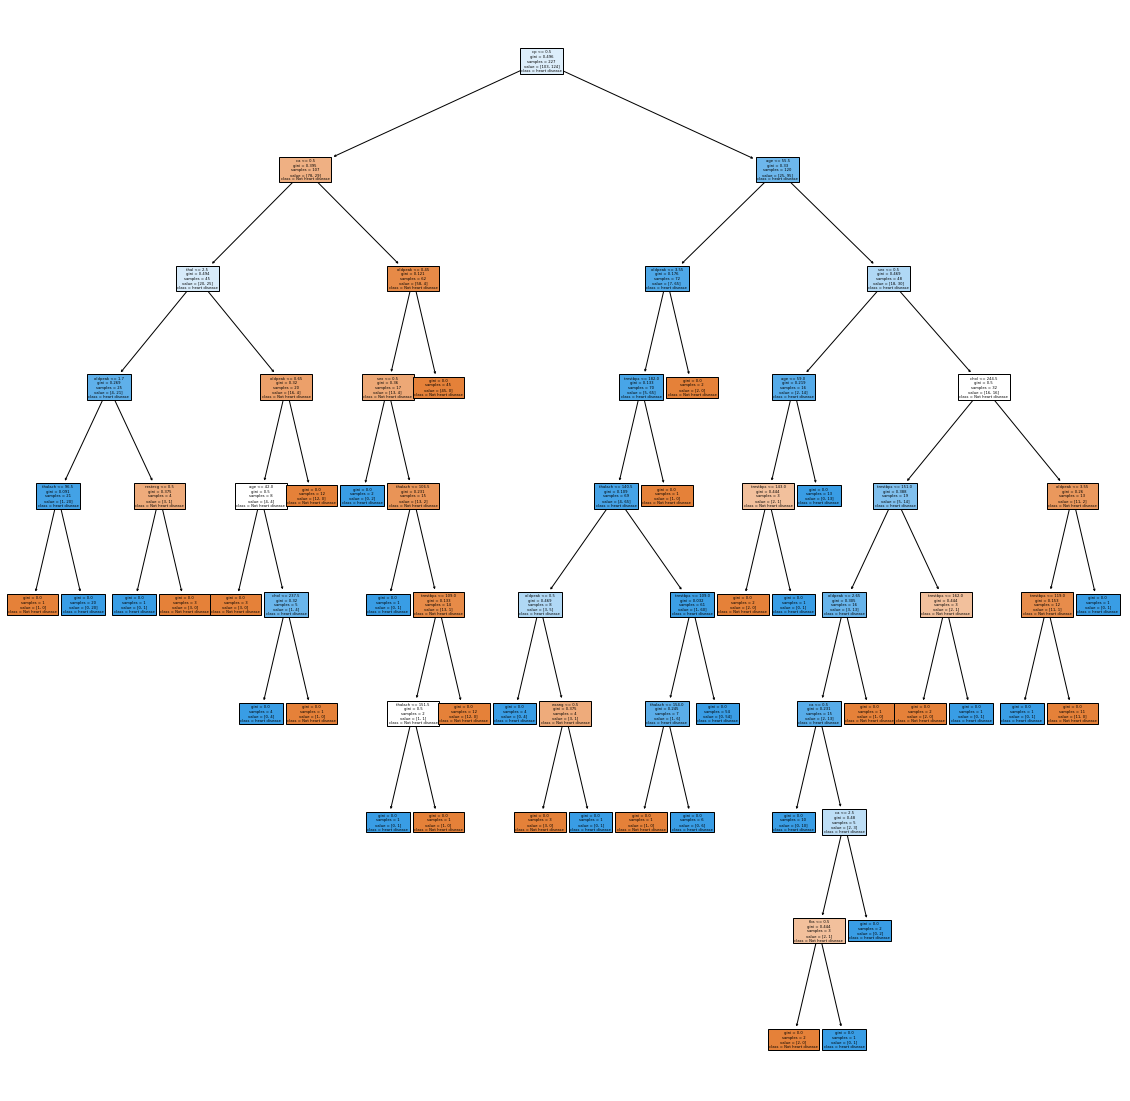

In [52]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [53]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.7763157894736842
Train Confusion matrix


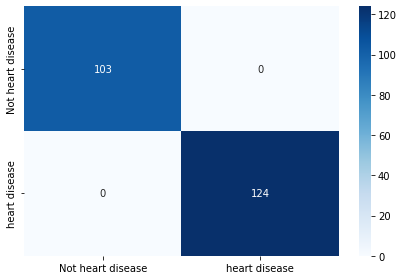

Test Confusion matrix


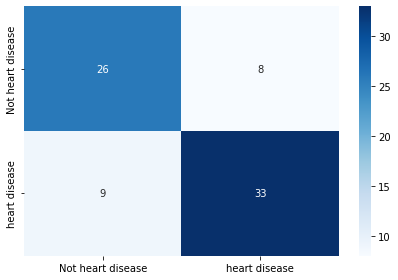

In [54]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

###1). Pre pruning on heart dataset

In [55]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 1.0
Test score 0.7763157894736842
Train Confusion matrix


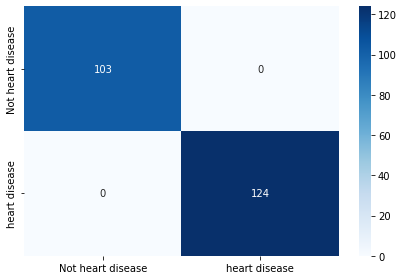

Test Confusion matrix


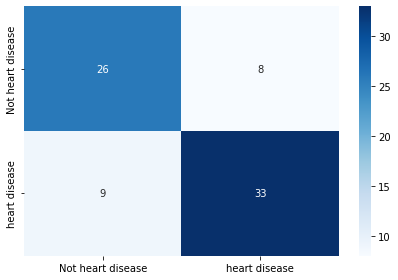

In [56]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

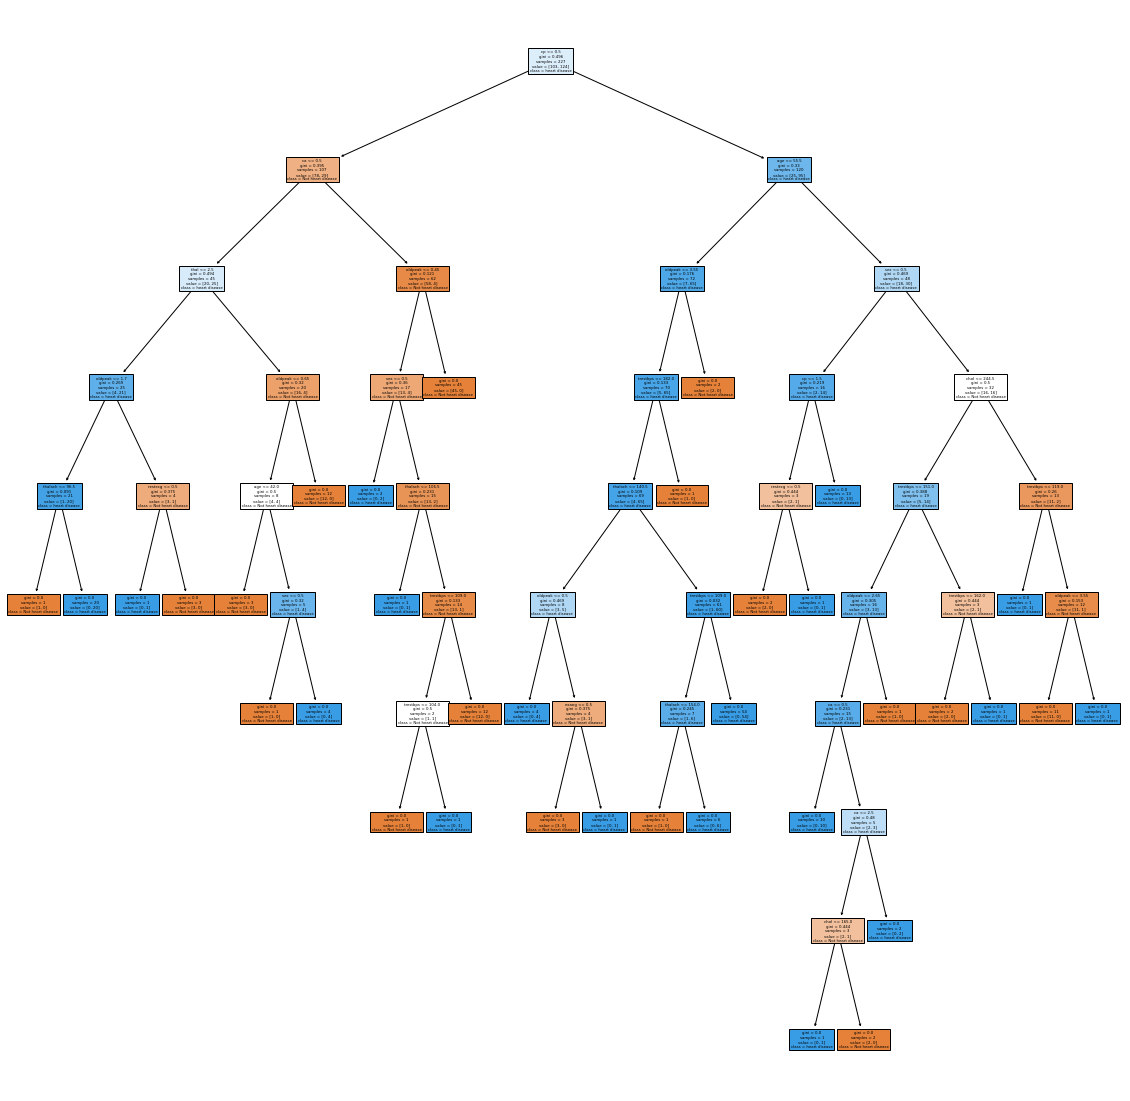

In [57]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

###2). Post pruning on heart dataset

In [58]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00409062 0.00433307 0.00509055 0.00572945 0.00587372
 0.00660793 0.00660793 0.00704846 0.00709041 0.0074551  0.00839102
 0.00854405 0.00884847 0.00954479 0.01057269 0.01460457 0.01477169
 0.01816512 0.01957905 0.0400979  0.05539331 0.13508779]


In [59]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=113, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

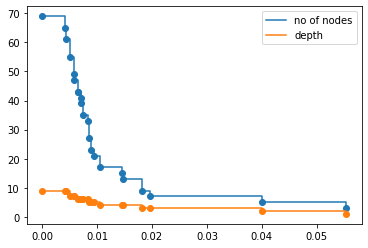

In [60]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

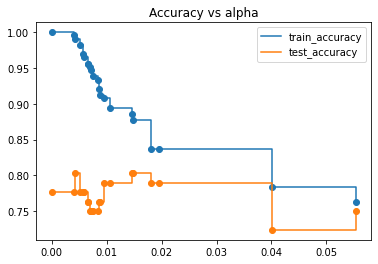

In [61]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8370044052863436
Test score 0.7894736842105263
Train Confusion matrix


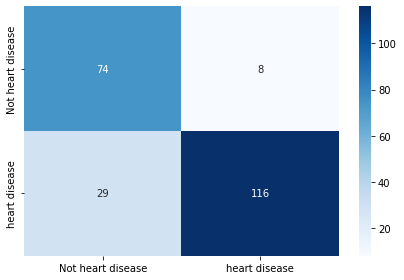

Test Confusion matrix


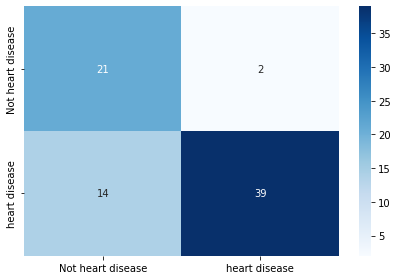

In [62]:
clf_ = tree.DecisionTreeClassifier(random_state=113,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

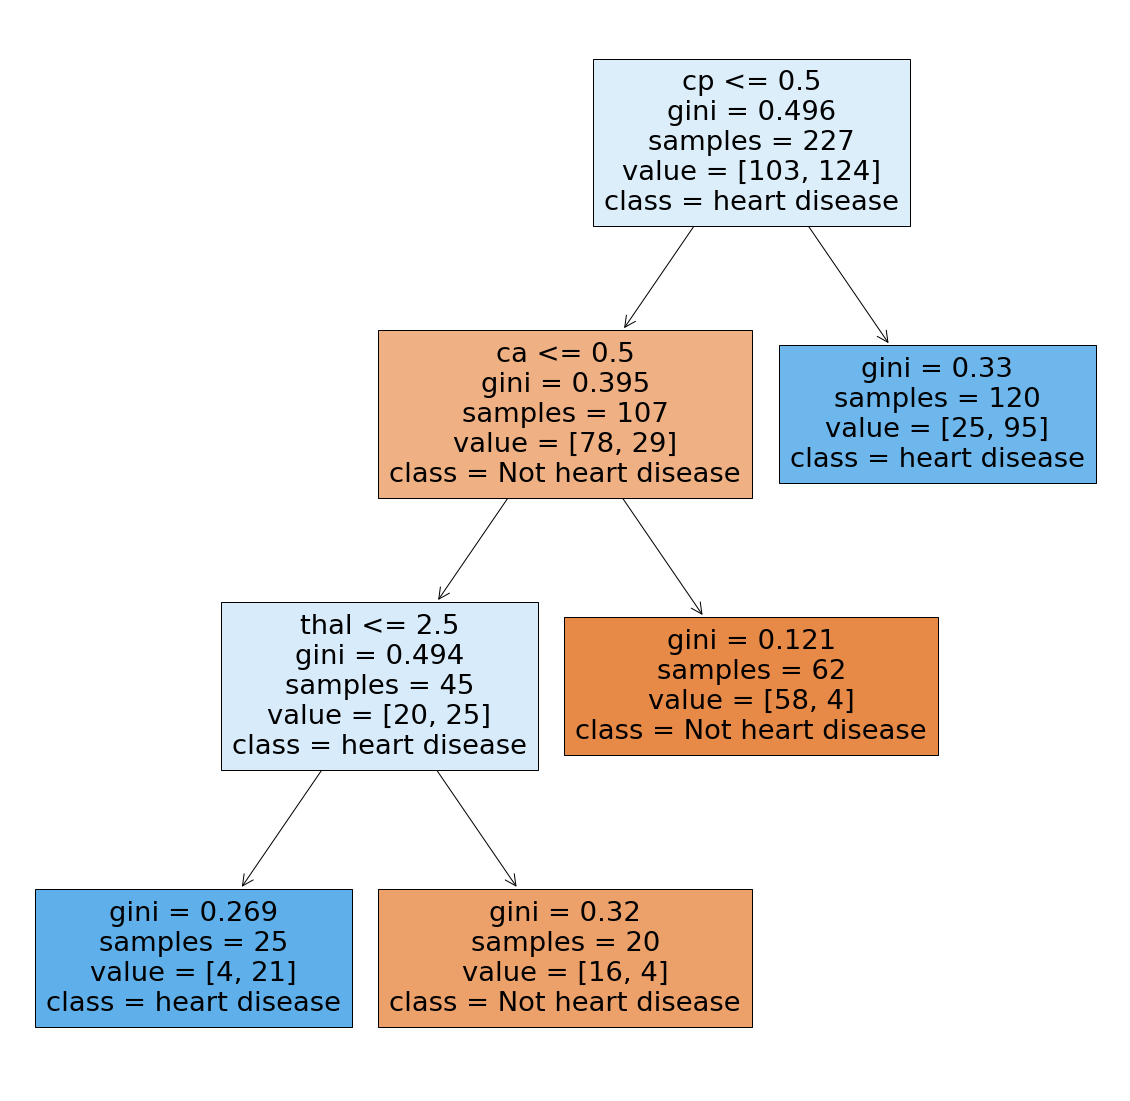

In [63]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()